In [6]:
import pandas as pd
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [116]:
#uploading a given dataset
df_original = pd.read_csv('/Users/vladleschev/Desktop/Проект 2 курс/!05&06_17_VSE.csv', sep=';', encoding='cp1251')

In [8]:
#For each column, we will output: the number of unique values, zero, NaNs and their percentage, data type 
def columnValues(df_original):
    row = [df_original.nunique(), (df_original == 0).sum(axis=0), df_original.isna().sum(), round(df_original.isna().sum() / len(df_original) * 100, 1), df_original.dtypes]
    return row

data = []
for column in df_original:
    data.append([column] + columnValues(df_original[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                   |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------+----------------+---------------+--------------+-------------+-------------|
| Дата                     |          26900 |             0 |            0 |         0   | object      |
| ДатаДоставки             |            111 |             0 |          397 |         0.1 | object      |
| НомерЗаказаНаСайте       |         173958 |             0 |            0 |         0   | object      |
| НовыйСтатус              |             14 |             0 |            0 |         0   | object      |
| СуммаЗаказаНаСайте       |          14802 |             0 |            0 |         0   | object      |
| СуммаДокумента           |          15180 |             0 |            0 |         0   | object      |
| МетодДоставки            |              6 |             0 |            2 |         0   | object      |
| ФормаОплаты              |              2 |          

## Firstly we need to "clean" our dataset with removing wrong data and columns which are not important for analytics 

In [117]:
#drop rows with 'Количество' equals to 0 
df_original = df_original.loc[df_original['Количество'] != 0]

In [118]:
#drop rows with 'Отменено' equals to 'Да' 
df_original = df_original.loc[df_original['Отменено'] != 'Да']

In [119]:
df_original.shape

(657781, 38)

In [120]:
#dropping columns which are not appropriate for the following analytics 
df_original = df_original.drop(columns=['ДатаДоставки' , 'НовыйСтатус','СуммаЗаказаНаСайте','СуммаДокумента','Регион','Группа4','Тип','Номенклатура','ТипТовара','Отменено','ПричинаОтмены','СуммаСтроки','ЦенаЗакупки','МесяцДатыЗаказа','ГодДатыЗаказа','ПВЗ_код','СуммаУслуг','СуммаДоставки','НомерСтроки','КоличествоПроданоКлиенту','ДатаЗаказаНаСайте','ЭлектроннаяПочта_new','Клиент','ID_SKU','ГородМагазина','МагазинЗаказа'])

In [121]:
df_original.shape

(657781, 12)

In [122]:
df_original.head()

,Дата,НомерЗаказаНаСайте,МетодДоставки,ФормаОплаты,Группа2,Группа3,Количество,Цена,Статус,Гео,Маржа,Телефон_new
0,01.05.2017 0:03,4513479_TR,Магазины,Безналичная,КРУПНОГАБАРИТНЫЙ ТОВАР,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,1,152,Доставлен,Москва,76,55574954-50515053535277
1,01.05.2017 10:18,4513492_TR,Pick point,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),1,499,Доставлен,Москва,199,55574851-50484949535070
2,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",1,120,Отменен,Москва,"72,5",55575054-55515752524870
3,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,279,Отменен,Москва,"127,77",55575054-55515752524870
4,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,279,Отменен,Москва,"136,78",55575054-55515752524870


In [486]:
#restoring data due to start of new stage of analytics 
df_original.to_excel("initial_cleanest_data1.xlsx", index=False)

KeyboardInterrupt: 

# Dataset Analytics

In [123]:
#uploading "cleaned" dataset
df = pd.read_excel('/Users/vladleschev/Desktop/Проект 2 курс/initial_cleanest_data1.xlsx')

In [71]:
df.head()

,Дата,НомерЗаказаНаСайте,МетодДоставки,ФормаОплаты,Группа2,Группа3,Количество,Цена,Статус,Гео,Маржа,Телефон_new
0,01.05.2017 0:03,4513479_TR,Магазины,Безналичная,КРУПНОГАБАРИТНЫЙ ТОВАР,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,1,152.0,Доставлен,Москва,76.00,55574954-50515053535277
1,01.05.2017 10:18,4513492_TR,Pick point,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),1,499.0,Доставлен,Москва,199.00,55574851-50484949535070
2,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",1,120.0,Отменен,Москва,72.50,55575054-55515752524870
3,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,279.0,Отменен,Москва,127.77,55575054-55515752524870
4,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,279.0,Отменен,Москва,136.78,55575054-55515752524870


In [124]:
#drop rows with 'Телефон_new' with value '0' because this column can be indicated as an individual client  
df = df.loc[df['Телефон_new'] != '0']

In [73]:
df.to_excel("initial_cleanest_data1(tables).xlsx", index=False)

In [125]:
#creating additional columns for further analysis
df['стоимостьСуммарная'] = df['Количество'] * df['Цена']
df['маржаСуммарная'] = df['Количество'] * df['Маржа']

In [126]:
df.head()

,Дата,НомерЗаказаНаСайте,МетодДоставки,ФормаОплаты,Группа2,Группа3,Количество,Цена,Статус,Гео,Маржа,Телефон_new,стоимостьСуммарная,маржаСуммарная
0,01.05.2017 0:03,4513479_TR,Магазины,Безналичная,КРУПНОГАБАРИТНЫЙ ТОВАР,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,1,152.0,Доставлен,Москва,76.00,55574954-50515053535277,152.0,76.00
1,01.05.2017 10:18,4513492_TR,Pick point,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),1,499.0,Доставлен,Москва,199.00,55574851-50484949535070,499.0,199.00
2,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",1,120.0,Отменен,Москва,72.50,55575054-55515752524870,120.0,72.50
3,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,279.0,Отменен,Москва,127.77,55575054-55515752524870,279.0,127.77
4,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,279.0,Отменен,Москва,136.78,55575054-55515752524870,279.0,136.78


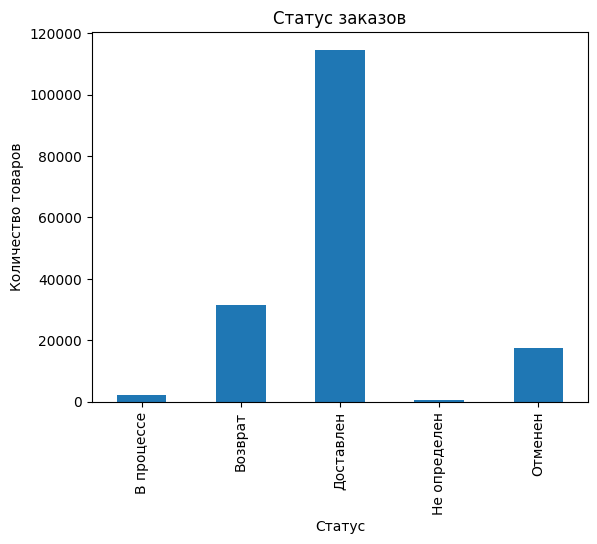

In [20]:
#status of orders

(df.groupby(['Статус'])['НомерЗаказаНаСайте'].nunique()).plot(kind='bar')
plt.xlabel('Статус')
plt.ylabel('Количество товаров')
plt.title('Статус заказов')
plt.show()

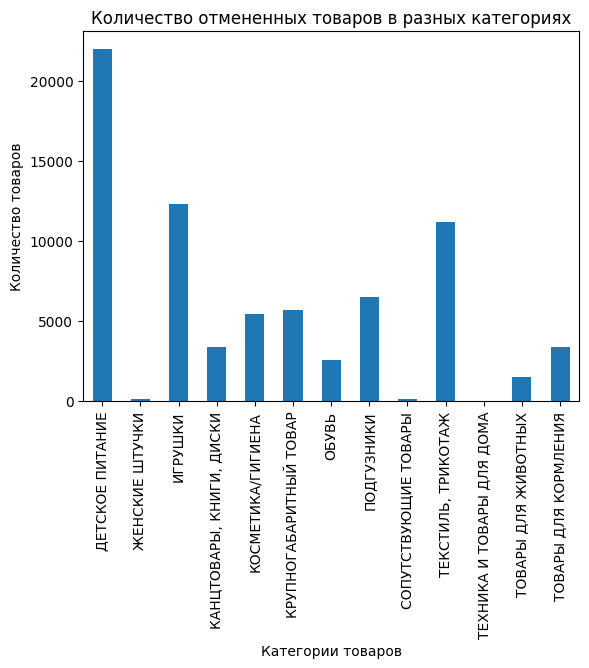

In [21]:
#creating a bar chart that displays the number of canceled items in different categories (где чаще всего отменяют)

(df[df['Статус']=='Отменен'].groupby(['Группа2'])['Количество'].sum()).plot(kind='bar')
plt.xlabel('Категории товаров')
plt.ylabel('Количество товаров')
plt.title('Количество отмененных товаров в разных категориях')
plt.show()

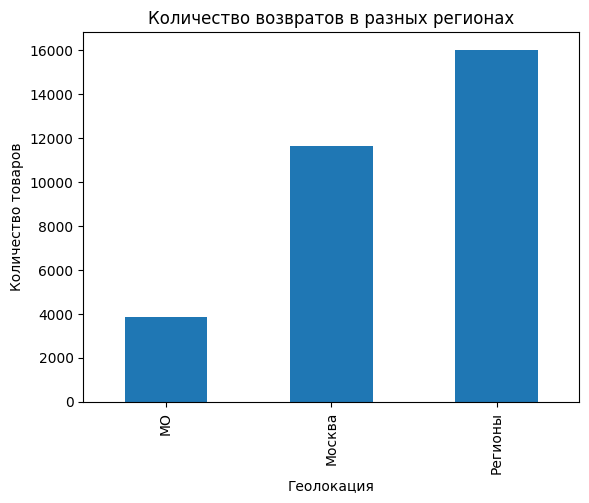

In [22]:
#creating a bar chart that displays the number of returns in different regions (где чаще всего возвращают)

(df[df['Статус']=='Возврат'].groupby(['Гео'])['НомерЗаказаНаСайте'].nunique()).plot(kind='bar')
plt.xlabel('Геолокация')
plt.ylabel('Количество товаров')
plt.title('Количество возвратов в разных регионах')
plt.show()

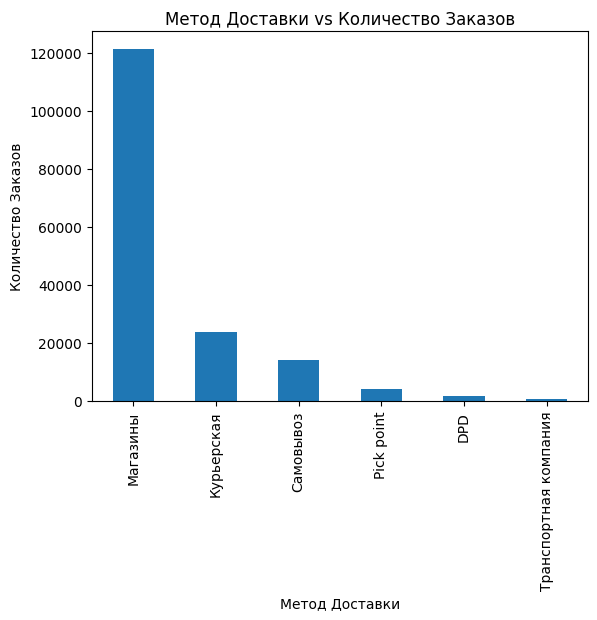

In [23]:
#creating a plot to find out which type of delivery clients prefer (метод доставки вс. кол-ва заказов)

df2 = df[['НомерЗаказаНаСайте', 'МетодДоставки']]
df2 = df2.drop_duplicates()

counts = df2['МетодДоставки'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Метод Доставки')
plt.ylabel('Количество Заказов')
plt.title('Метод Доставки vs Количество Заказов')
plt.show()

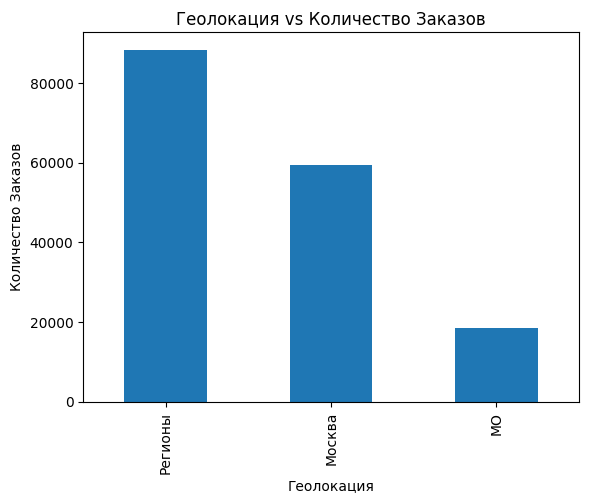

In [24]:
#number of orders by region

df2 = df[['НомерЗаказаНаСайте', 'Гео']]
df2 = df2.drop_duplicates()

counts = df2['Гео'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Геолокация')
plt.ylabel('Количество Заказов')
plt.title('Геолокация vs Количество Заказов')
plt.show()

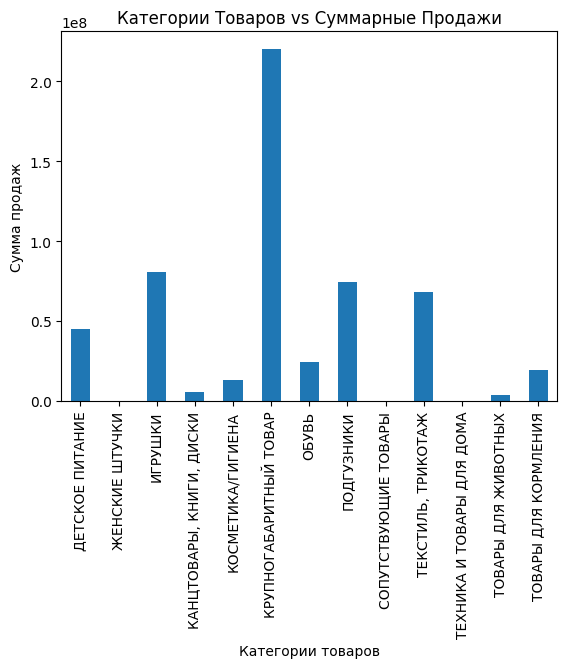

In [25]:
#creating a plot for understanding which type of goods are the  best in total sales ... (категория вс. суммарные продажи)

df2 = df[['НомерЗаказаНаСайте', 'Группа2', 'стоимостьСуммарная']]
df2 = df2.drop_duplicates()

df2.groupby('Группа2')['стоимостьСуммарная'].sum().plot(kind='bar')
plt.xlabel('Категории товаров')
plt.ylabel('Сумма продаж')
plt.title('Категории Товаров vs Суммарные Продажи')
plt.show()

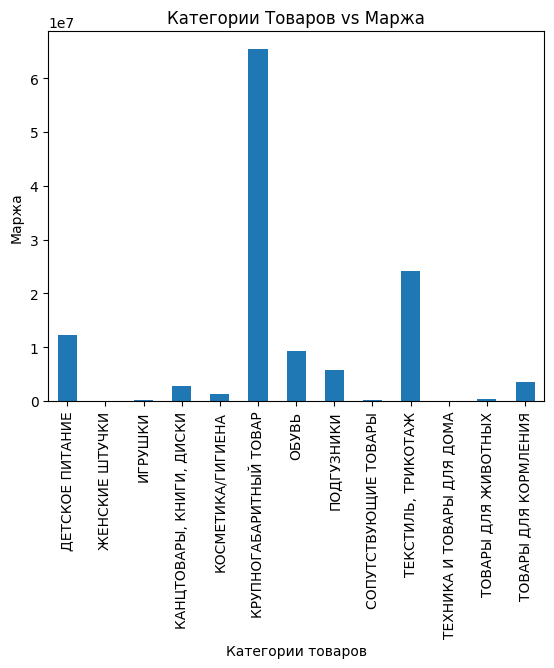

In [26]:
#product categories and their margins

df2 = df[['НомерЗаказаНаСайте', 'Группа2', 'маржаСуммарная', 'Группа3']]
df2 = df2.drop_duplicates()

df2.groupby('Группа2')['маржаСуммарная'].sum().plot(kind='bar')
plt.xlabel('Категории товаров')
plt.ylabel('Маржа')
plt.title('Категории Товаров vs Маржа')
plt.show()

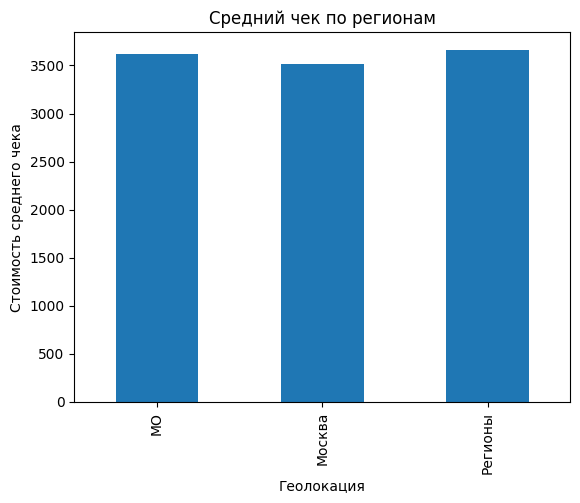

In [27]:
#average check by region

(df.groupby(['Гео', 'НомерЗаказаНаСайте'])['стоимостьСуммарная'].sum()).groupby('Гео').mean().plot(kind='bar')
plt.xlabel('Геолокация')
plt.ylabel('Стоимость среднего чека')
plt.title('Средний чек по регионам')
plt.show()

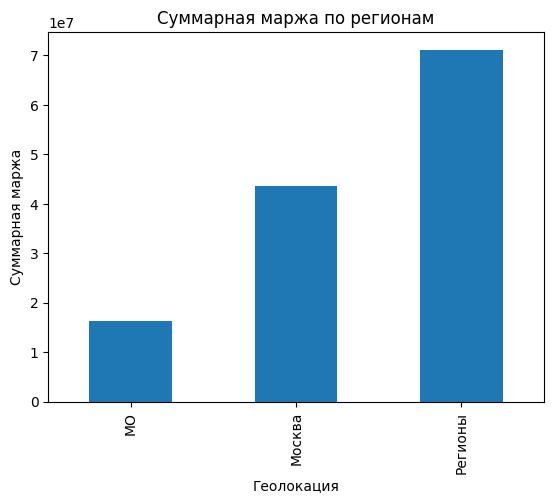

In [28]:
#total margin by region

(df.groupby(['Гео', 'НомерЗаказаНаСайте'])['маржаСуммарная'].sum()).groupby('Гео').sum().plot(kind='bar')
plt.xlabel('Геолокация')
plt.ylabel('Суммарная маржа')
plt.title('Суммарная маржа по регионам')
plt.show()

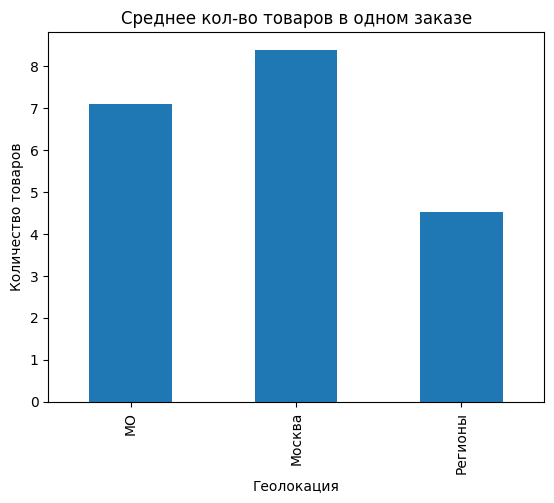

In [29]:
# average number of products in one order

(df.groupby(['Гео', 'НомерЗаказаНаСайте'])['Количество'].sum()).groupby('Гео').mean().plot(kind='bar')
plt.xlabel('Геолокация')
plt.ylabel('Количество товаров')
plt.title('Среднее кол-во товаров в одном заказе')
plt.show()

# Assembling a showcase for segmentation (ВИТРИНА)

In [127]:
#creating a column for a quantity of orders 
a1 = df.groupby(['Телефон_new'])['НомерЗаказаНаСайте'].nunique()

In [128]:
#creating a column for an average check
a2 = df.groupby(['Телефон_new', 'НомерЗаказаНаСайте'])['стоимостьСуммарная'].sum().groupby('Телефон_new').sum()

In [129]:
#creating a column for an average quantity of orders
a3 = df.groupby(['Телефон_new', 'НомерЗаказаНаСайте'])['Количество'].sum().groupby('Телефон_new').mean()

In [130]:
#creating a column for a revenue
a4 = df.groupby(['Телефон_new', 'НомерЗаказаНаСайте'])['Количество'].sum().groupby('Телефон_new').sum()

In [131]:
#creating a column for an total quantity of goods for one client
a5 = df.groupby(['Телефон_new', 'НомерЗаказаНаСайте'])['маржаСуммарная'].sum().groupby('Телефон_new').sum()

In [132]:
#creating a column for an average margin
a6 = df.groupby(['Телефон_new', 'НомерЗаказаНаСайте'])['маржаСуммарная'].sum().groupby('Телефон_new').mean()

In [133]:
#creating a table with new columns
bb = pd.concat([a1, a2, a3, a4, a5, a6], axis=1)
bb.columns = ['Количество заказов', 'Средний чек', 'Среднее количество товаров', 'Выручка', 'Общее количество товаров', 'Средняя маржа']

In [134]:
bb

,Количество заказов,Средний чек,Среднее количество товаров,Выручка,Общее количество товаров,Средняя маржа
Телефон_new,,,,,,
49484949-49494949494911,1,3089.0,17.0,17,4408.82,4408.820000
52535348-48484848484840,1,1090.0,1.0,1,110.00,110.000000
52575355-48514856495345,1,2214.0,7.0,7,681.41,681.410000
54545548-48484848484860,1,2717.0,4.0,4,891.45,891.450000
55484848-48484848484870,3,2244.0,2.0,6,516.95,172.316667
...,...,...,...,...,...,...
57555148-48484848484890,1,27640.0,2.0,2,8752.00,8752.000000
57555557-52515150525092,1,5915.0,16.0,16,2453.32,2453.320000
57565349-55535352575597,1,5149.0,2.0,2,544.30,544.300000


In [74]:
bb.to_excel("initial_cleanest_data0.xlsx", index=False)

# Data Normalization

In [38]:
df = df.drop(['Дата', 'НомерЗаказаНаСайте', 'Телефон_new', 'Группа3'], axis=1)

In [39]:
df = df.dropna()

In [40]:
df = pd.get_dummies(df)

In [64]:
df

,Количество,Цена,Маржа,стоимостьСуммарная,маржаСуммарная,МетодДоставки_DPD,МетодДоставки_Pick point,МетодДоставки_Курьерская,МетодДоставки_Магазины,МетодДоставки_Самовывоз,...,Группа2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Статус_В процессе,Статус_Возврат,Статус_Доставлен,Статус_Не определен,Статус_Отменен,Гео_МО,Гео_Москва,Гео_Регионы,n_cluster
0,1,152.0,76.00,152.0,76.00,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,1
1,1,499.0,199.00,499.0,199.00,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,1
2,1,120.0,72.50,120.0,72.50,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1
3,1,279.0,127.77,279.0,127.77,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1
4,1,279.0,136.78,279.0,136.78,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709917,2,343.0,33.58,686.0,67.16,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,1
709918,3,255.0,166.71,765.0,500.13,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,1
709919,1,199.0,103.00,199.0,103.00,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,1
709920,4,84.0,0.40,336.0,1.60,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,1


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)
data

array([[-0.25205639, -0.30253493, -0.17090666, ..., -0.3867812 ,
         1.10847388, -0.85302364],
       [-0.25205639, -0.1535674 , -0.00708932, ..., -0.3867812 ,
         1.10847388, -0.85302364],
       [-0.25205639, -0.31627258, -0.17556812, ..., -0.3867812 ,
         1.10847388, -0.85302364],
       ...,
       [-0.25205639, -0.28235778, -0.13494675, ..., -0.3867812 ,
        -0.90214124,  1.17230045],
       [ 1.17299892, -0.33172742, -0.27159439, ..., -0.3867812 ,
        -0.90214124,  1.17230045],
       [ 0.22296205, -0.33172742, -0.27186075, ..., -0.3867812 ,
        -0.90214124,  1.17230045]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

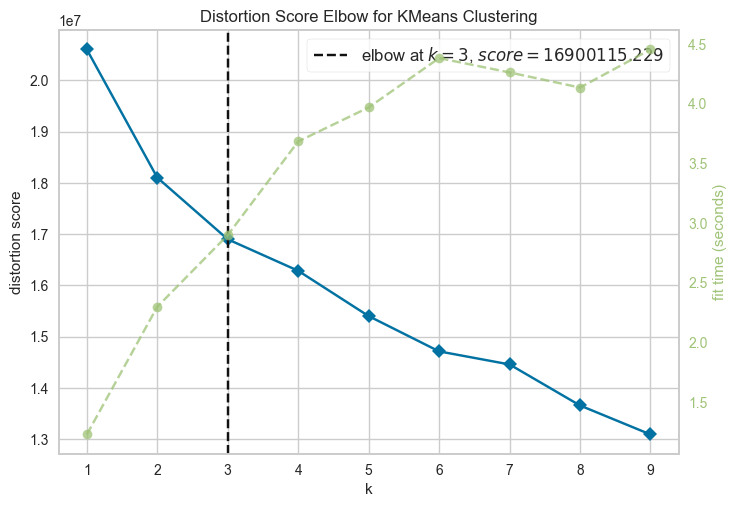

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings= True)
visualizer.fit(data)
visualizer.show()

In [43]:
clustering = KMeans(n_clusters=3, random_state=0).fit(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
df['n_cluster'] = clustering.labels_

In [45]:
def get_cluster_hist(col_name=[], log_scale=False):
    clr = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
    if len(col_name) <= 1:
        # numerical
        fig, axes = plt.subplots(figsize=(17, 4), nrows=1, ncols=clustering.n_clusters)
        for i in range(clustering.n_clusters):
            data_ = df[df['n_cluster']==i]
            data_[col_name].hist(ax=axes[i], color=clr[i])
            axes[i].axvline(data_[col_name[0]].mean(), color='k', linestyle='dashed', linewidth=1)
            axes[i].set_title(f'Cluster: {i+1}')
            if log_scale: axes[i].set_xscale('log')
        plt.show()
    else:
        # categorical
        fig, axes = plt.subplots(figsize=(17, 4), nrows=1, ncols=clustering.n_clusters)
        for i in range(clustering.n_clusters):
            data_ = df[df['n_cluster']==i]
            y = []
            for col in col_name:
                y.append(data_[col].sum())
            axes[i].bar(col_name, y, color=clr[i])
            axes[i].set_title(f'Cluster: {i+1}')
            axes[i].tick_params(axis='x', rotation=90)

        plt.show()

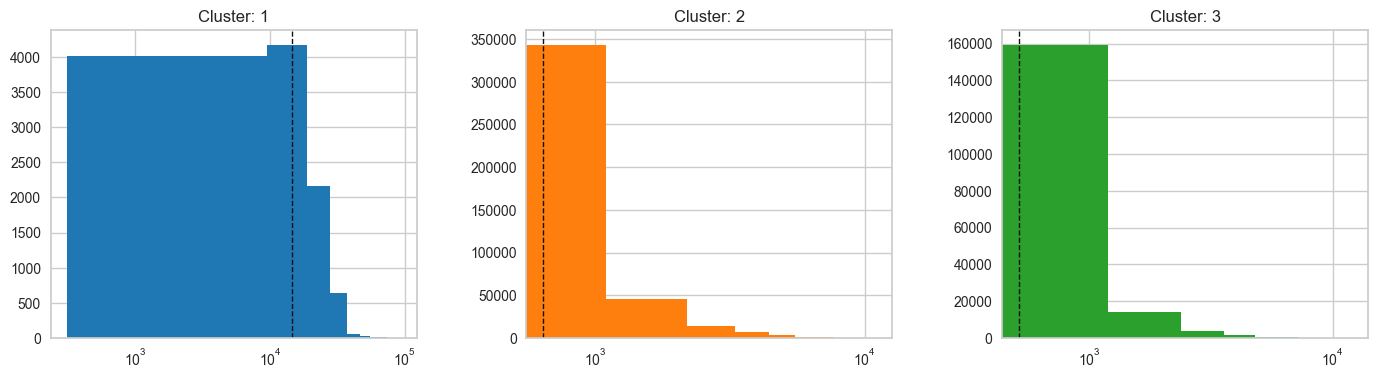

In [46]:
get_cluster_hist(['Цена'], log_scale=True)

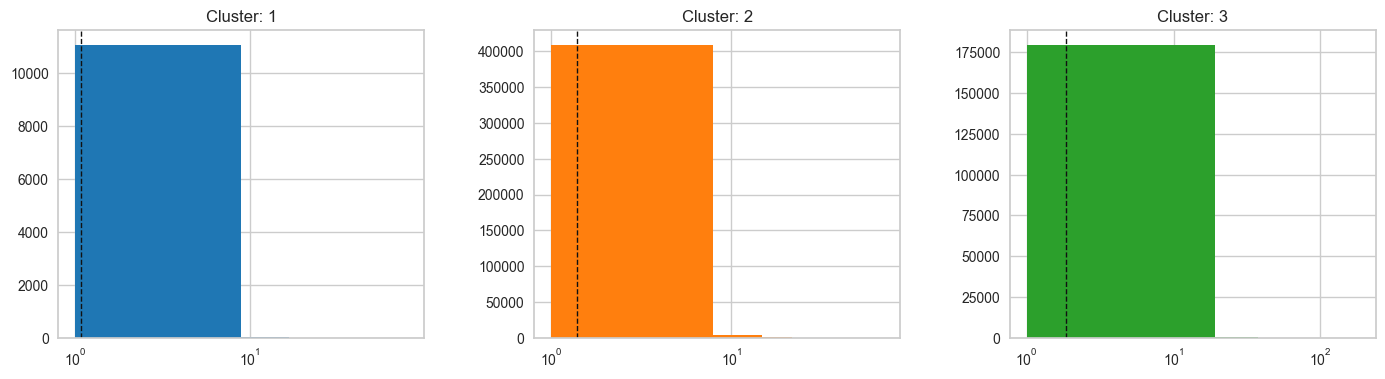

In [47]:
get_cluster_hist(['Количество'], log_scale=True)

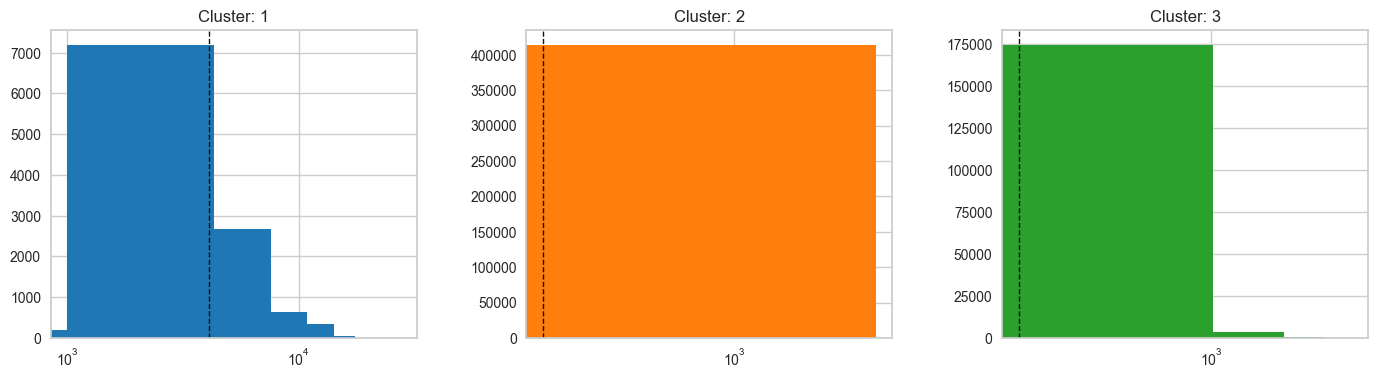

In [48]:
get_cluster_hist(['Маржа'], log_scale=True)

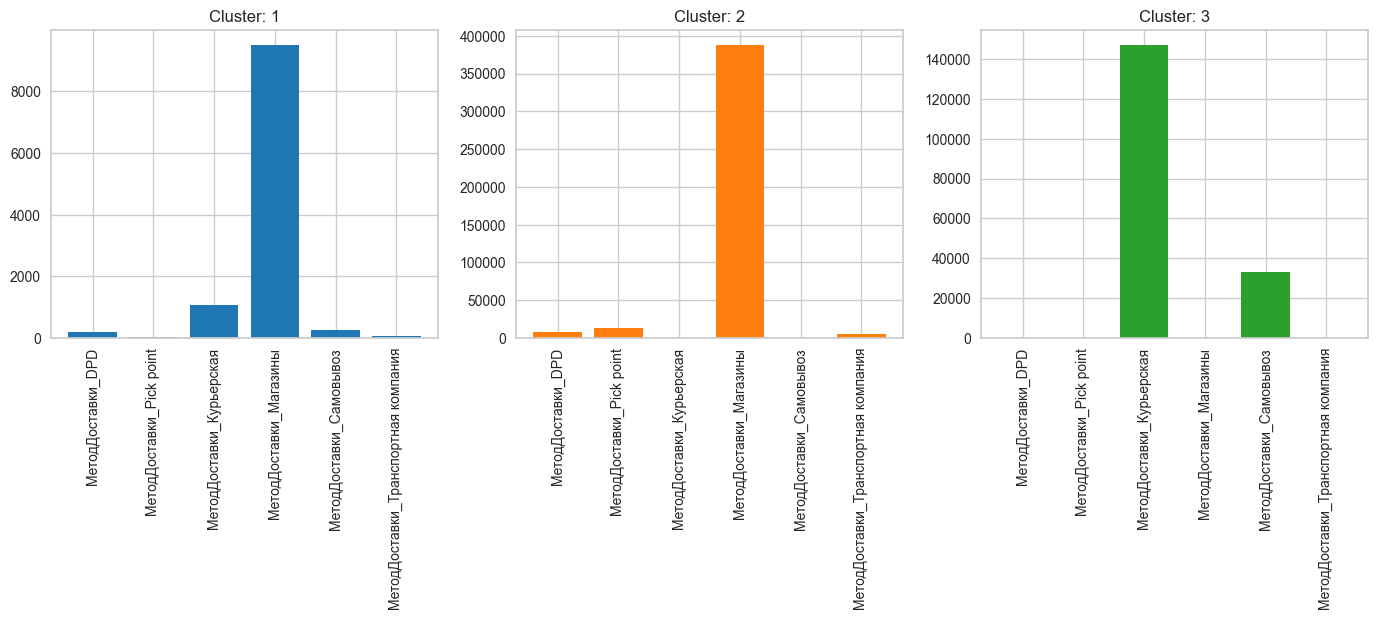

In [49]:
get_cluster_hist(['МетодДоставки_DPD', 'МетодДоставки_Pick point', 'МетодДоставки_Курьерская',
       'МетодДоставки_Магазины', 'МетодДоставки_Самовывоз',
       'МетодДоставки_Транспортная компания'])

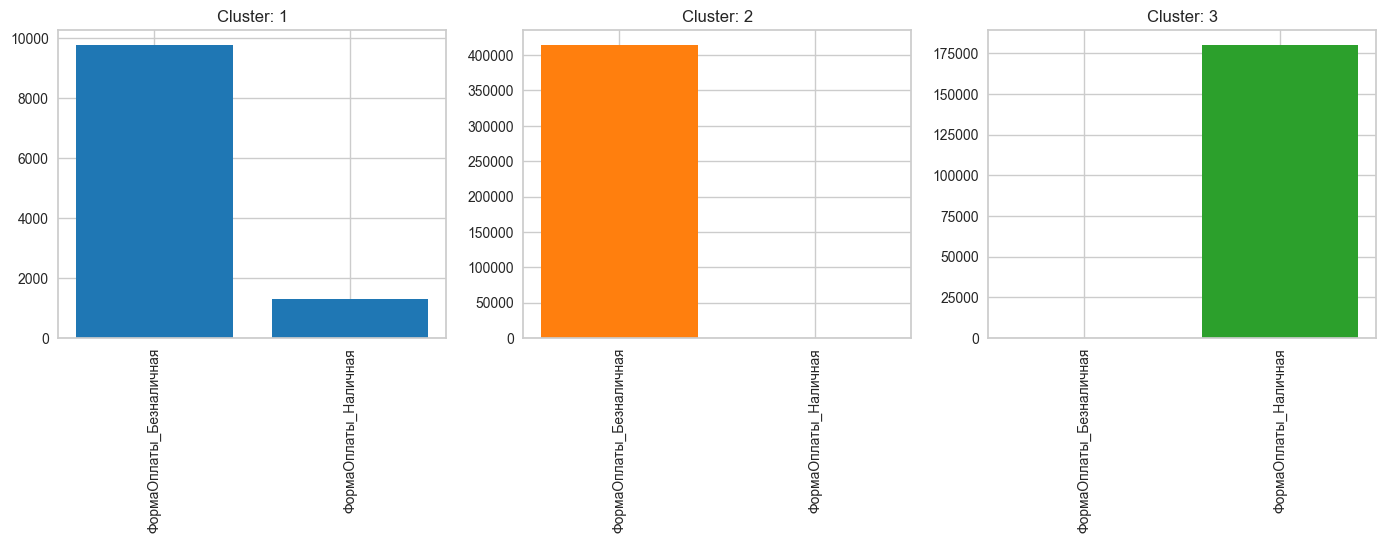

In [50]:
get_cluster_hist(['ФормаОплаты_Безналичная','ФормаОплаты_Наличная'])

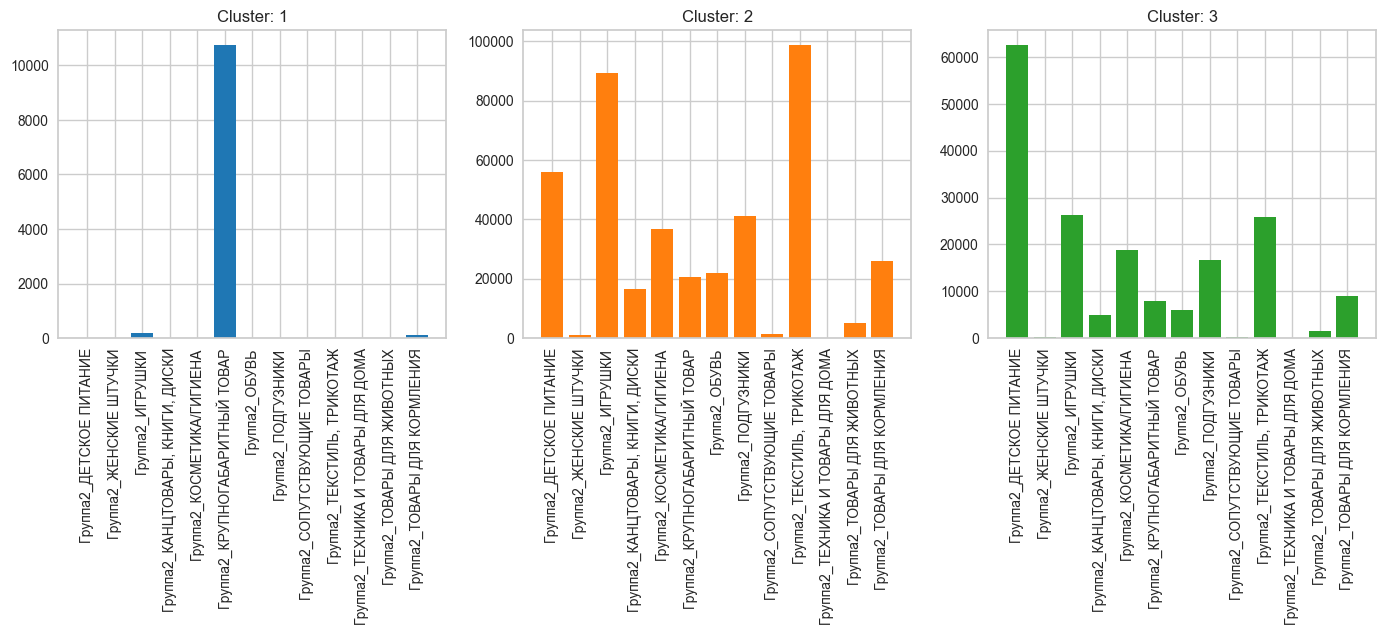

In [51]:
get_cluster_hist(['Группа2_ДЕТСКОЕ ПИТАНИЕ',
       'Группа2_ЖЕНСКИЕ ШТУЧКИ', 'Группа2_ИГРУШКИ',
       'Группа2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'Группа2_КОСМЕТИКА/ГИГИЕНА',
       'Группа2_КРУПНОГАБАРИТНЫЙ ТОВАР', 'Группа2_ОБУВЬ', 'Группа2_ПОДГУЗНИКИ',
       'Группа2_СОПУТСТВУЮЩИЕ ТОВАРЫ', 'Группа2_ТЕКСТИЛЬ, ТРИКОТАЖ',
       'Группа2_ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА', 'Группа2_ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
       'Группа2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'])

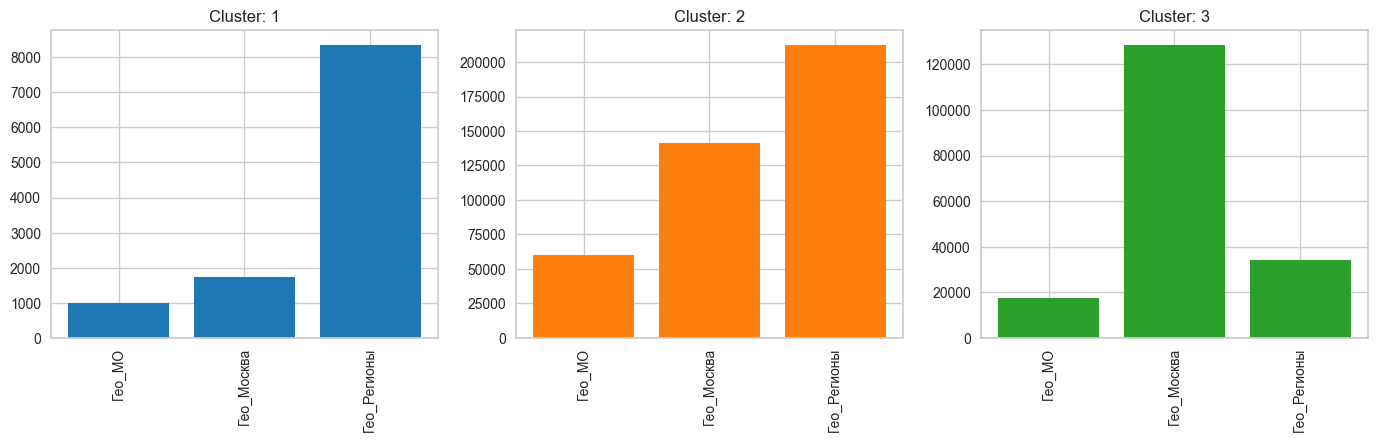

In [52]:
get_cluster_hist(['Гео_МО', 'Гео_Москва', 'Гео_Регионы'])

In [57]:
from sklearn.decomposition import PCA, TruncatedSVD

In [58]:
Y_pca = PCA(n_components=3).fit_transform(data);
Y_svd = TruncatedSVD(n_components=3).fit_transform(data);

In [61]:
from sklearn.cluster import KMeans #DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from scipy.spatial.distance import cdist

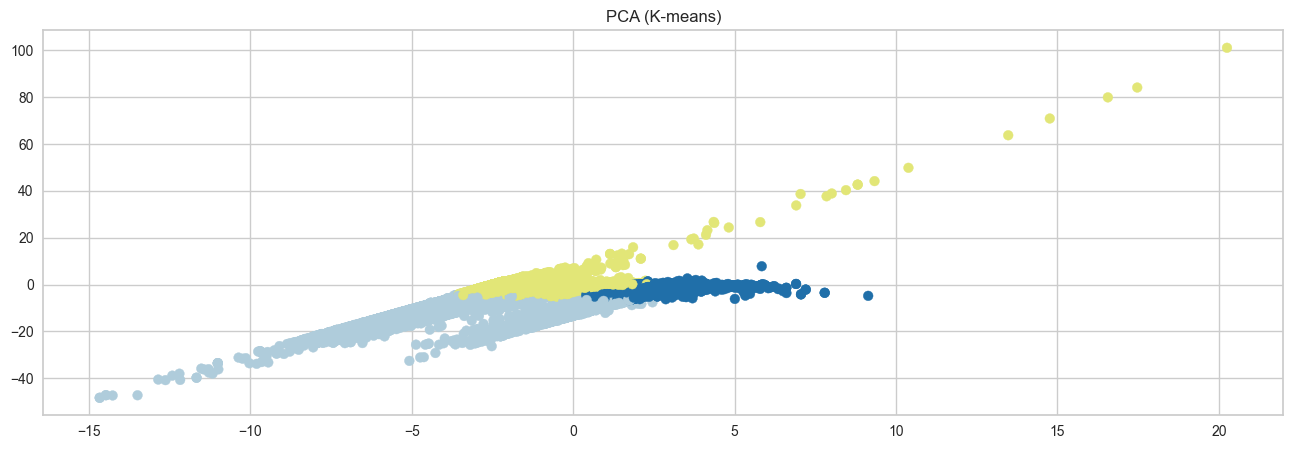

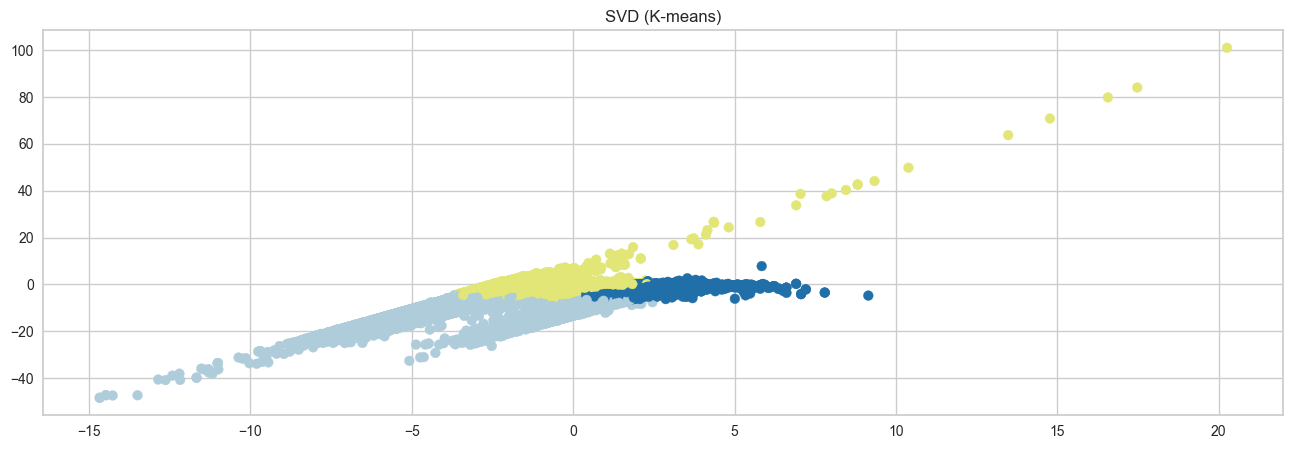

In [66]:
#visualistion of clusters 
np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(16,5));
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

plt.figure(figsize=(16,5)); plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr);

# EM algorithm

In [55]:
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics

In [67]:
results_sil_em = {}
for i in range(2, 14):
    
    gmm = GaussianMixture(n_components = i)
    labels = gmm.fit_predict(data)
    
    sil_score = metrics.silhouette_score(data, labels)
    results_sil_em.update({i: sil_score})
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 14, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.show()

KeyboardInterrupt: 

In [ ]:
results_ch_em = {}
for i in range(2, 14):
    
    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(data)
    
    ch_score = metrics.davies_bouldin_score(data, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

In [ ]:
results_ch_em = {}
for i in range(2, 14):
    
    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(data)
    
    ch_score = metrics.calinski_harabasz_score(data, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

In [136]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(data.shape[0]):
    if model.labels_[i] == 0:
        cluster_1.append(data[i])
    elif model.labels_[i] == 1:
        cluster_2.append(data[i])
    elif model.labels_[i] == 2:
        cluster_3.append(data[i])

In [137]:
len(cluster_1)

249805

In [138]:
len(cluster_2)

27574

In [139]:
len(cluster_3)

1253

In [144]:
#uploading
bb = pd.DataFrame(bb)

In [145]:
labels = pd.DataFrame(model.labels_)
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
605949,3
605950,3
605951,0
605952,0


In [149]:
bb['Кластер'] = labels
bb.dropna()

,Дата,НомерЗаказаНаСайте,МетодДоставки,ФормаОплаты,Группа2,Группа3,Количество,Цена,Статус,Гео,Маржа,Телефон_new,стоимостьСуммарная,маржаСуммарная,Кластер
0,01.05.2017 0:03,4513479_TR,Магазины,Безналичная,КРУПНОГАБАРИТНЫЙ ТОВАР,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,1,152.0,Доставлен,Москва,76.00,55574954-50515053535277,152.0,76.00,0.0
1,01.05.2017 10:18,4513492_TR,Pick point,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),1,499.0,Доставлен,Москва,199.00,55574851-50484949535070,499.0,199.00,0.0
2,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",1,120.0,Отменен,Москва,72.50,55575054-55515752524870,120.0,72.50,0.0
3,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,279.0,Отменен,Москва,127.77,55575054-55515752524870,279.0,127.77,0.0
4,01.05.2017 0:03,4513499_TR,Магазины,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,279.0,Отменен,Москва,136.78,55575054-55515752524870,279.0,136.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605946,29.06.2017 21:39,5023265_TR,Магазины,Безналичная,ПОДГУЗНИКИ,ПЕЛЕНКИ ОДНОРАЗОВЫЕ,1,158.0,Доставлен,Регионы,22.10,55575351-52515451495271,158.0,22.10,0.0
605947,29.06.2017 10:28,5018762_TR,Магазины,Безналичная,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,1,1258.0,Доставлен,Москва,391.96,55574948-52485555495578,1258.0,391.96,0.0
605948,29.06.2017 10:28,5018771_TR,Магазины,Безналичная,ИГРУШКИ,ТВОРЧЕСТВО,1,87.0,Отменен,Москва,29.16,55575456-57504848545672,87.0,29.16,3.0
605952,19.06.2017 16:10,4934589_TR,Магазины,Безналичная,ПОДГУЗНИКИ,ПОДГУЗНИКИ,1,1659.0,Доставлен,Москва,-394.75,55574857-54575348545471,1659.0,-394.75,0.0


In [150]:
bb = bb.loc[bb['Кластер'] != 0]
bb

,Дата,НомерЗаказаНаСайте,МетодДоставки,ФормаОплаты,Группа2,Группа3,Количество,Цена,Статус,Гео,Маржа,Телефон_new,стоимостьСуммарная,маржаСуммарная,Кластер
6,01.05.2017 10:00,4513466_TR,Курьерская,Наличная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,1,99.0,Доставлен,МО,58.04,55574851-50515554525072,99.0,58.04,4.0
7,01.05.2017 10:00,4513466_TR,Курьерская,Наличная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,1,69.0,Доставлен,МО,28.04,55574851-50515554525072,69.0,28.04,4.0
8,01.05.2017 10:00,4513466_TR,Курьерская,Наличная,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,1,199.0,Доставлен,МО,151.83,55574851-50515554525072,199.0,151.83,4.0
9,01.05.2017 15:27,4513472_TR,Курьерская,Наличная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),1,678.2,Доставлен,Москва,316.77,55575456-53575451535378,678.2,316.77,4.0
10,01.05.2017 15:27,4513472_TR,Курьерская,Наличная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,1,89.0,Доставлен,Москва,51.00,55575456-53575451535378,89.0,51.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709917,30.06.2017 23:08,5031550_TR,Магазины,Безналичная,ДЕТСКОЕ ПИТАНИЕ,ЗАМЕНИТЕЛИ МОЛОКА,2,343.0,Отменен,МО,33.58,55574953-50495349574974,686.0,67.16,NaN
709918,30.06.2017 23:08,5031550_TR,Магазины,Безналичная,ДЕТСКОЕ ПИТАНИЕ,ЗАМЕНИТЕЛИ МОЛОКА,3,255.0,Отменен,МО,166.71,55574953-50495349574974,765.0,500.13,NaN
709919,30.06.2017 23:13,5031575_TR,Pick point,Безналичная,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),1,199.0,Доставлен,Регионы,103.00,55575348-48504953555074,199.0,103.00,NaN
709920,30.06.2017 23:58,5031783_TR,Магазины,Безналичная,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,4,84.0,Доставлен,Регионы,0.40,55575450-53495456535575,336.0,1.60,NaN


In [ ]:
means = bb.groupby('Кластер').mean()

In [ ]:
means.to_csv('сводКластер.csv', index=False, sep=';', encoding='utf-8-sig')